In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

/Users/neisner/opt/anaconda3/lib/python3.9/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/neisner/.lightkurve/cache. Please move all the files in the legacy directory /Users/neisner/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [3]:
search = lk.search_lightcurve('U Gru', cadence=120)
lc = search[-1].download().remove_nans().remove_outliers().normalize()

<IPython.core.display.Javascript object>


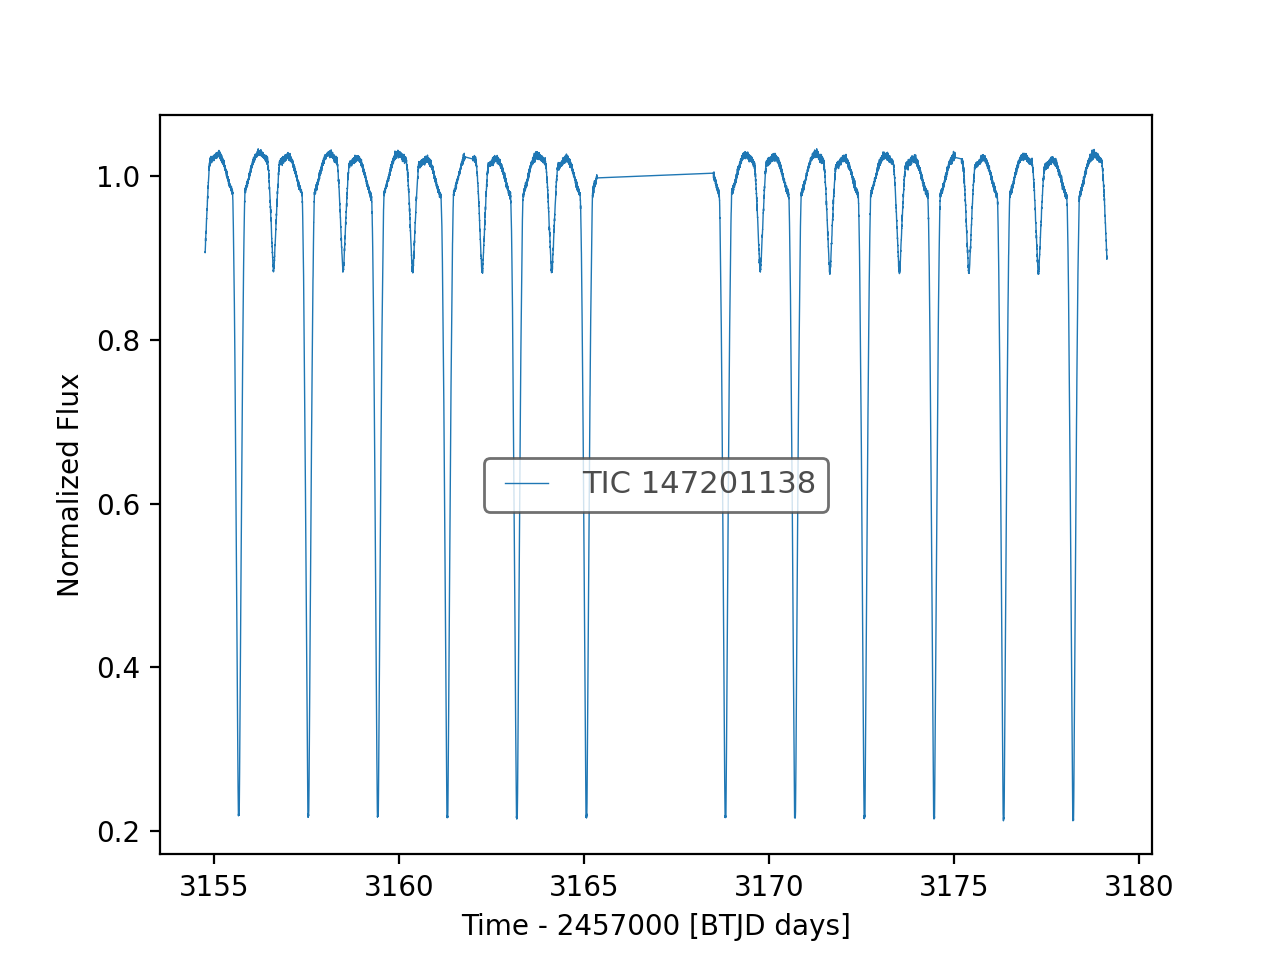

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

In [4]:
fig_lc, ax_lc = plt.subplots()
lc.plot(ax=ax_lc)

<IPython.core.display.Javascript object>


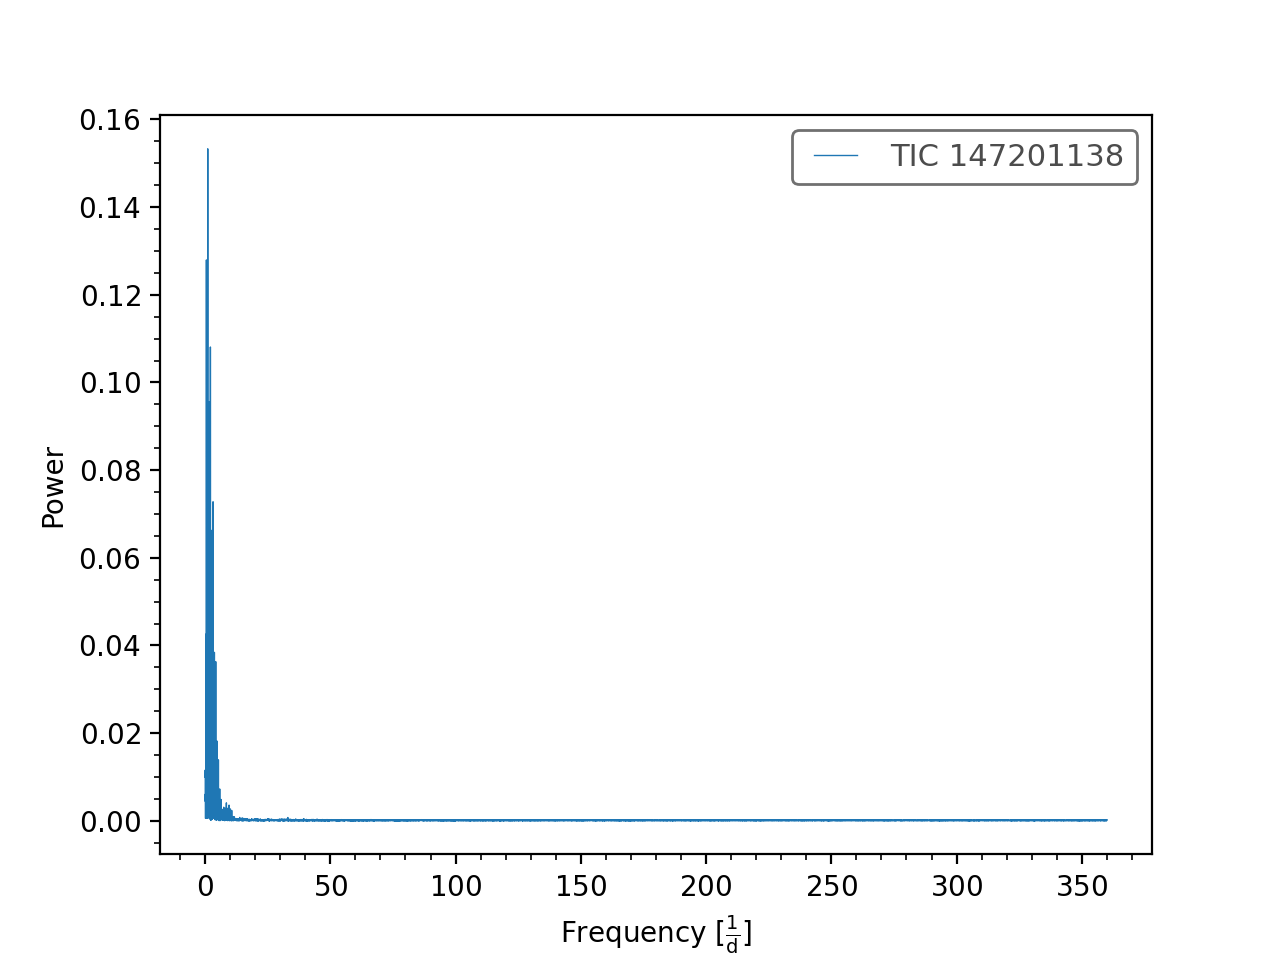

In [5]:
ls = lc.to_periodogram()
fig, ax = plt.subplots()
ls.plot(ax=ax)
plt.show()

In [6]:
period = 1.8805
time = lc.time.value
flux = lc.flux.value
ferr = lc.flux_err.value

In [7]:
p2 = 2./ls.frequency.value[np.argmax(ls.power.value)]

In [8]:
def design_matrix(ts, T, n_modes):
    omegas = 2. * np.pi * np.arange(1, n_modes + 1) / T
    X = np.zeros((len(ts), 2 * n_modes))
    X[:,::2] = np.cos(omegas[None, :] * ts[:, None]) # I'm dyin heah
    X[:,1::2] = np.sin(omegas[None, :] * ts[:, None])
    return X

In [9]:
K = 30
X = design_matrix(time, period, K)
print(X.shape)
print(flux.shape)
print(time.shape)
amps = np.linalg.solve(X.T @ X, X.T @ flux)

# amps, resids, rank, S = np.linalg.lstsq(X, flux, rcond=None)

(15000, 60)
(15000,)
(15000,)


In [10]:
synth = X @ amps
resid = flux - synth

In [17]:
#from astropy.timeseries import LombScargle
#
#f, amp_wg = LombScargle(time, resid).autopower()
#
#fig, ax = plt.subplots()
#
#plt.plot(f, amp_wg)

In [ ]:
fig_, ax_ = plt.subplots(num=7)
ax_.plot(nu, amp)